# Notebook 6: 导数与梯度(Derivatives & Gradients) - 找到下山最快的路

我们已经定义了目标（最小化损失函数），现在需要找到方法。想象一下，你正站在一个浓雾弥漫的山上（高维的损失景观），你只能看到脚下的一小块地方。你怎么才能最快地走到山谷的最低点呢？

**目标:** 直观地理解导数和梯度，明白它们为什么是指导我们优化模型参数的“GPS”。

**核心直觉:** 脚下的坡度。
导数（在一维情况下）或梯度（在多维情况下）就是你脚下地面的“坡度”和“方向”。它会告诉你：
1.  **方向:** 哪个方向是坡最陡峭的？
2.  **大小:** 这个方向的坡有多陡？

为了最快下山，你只需要朝着“最陡峭的下坡方向”（也就是梯度的反方向）迈出一步，然后重复这个过程。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 导数：一维的斜率

让我们从简单的一维函数开始，比如 `f(x) = x²`。函数在某一点的导数就是该点切线的斜率。它告诉我们，当 `x` 发生一个微小的变化时，`f(x)` 会如何变化。

如果斜率是正数，说明向右走是上坡；如果斜率是负数，说明向右走是下坡。

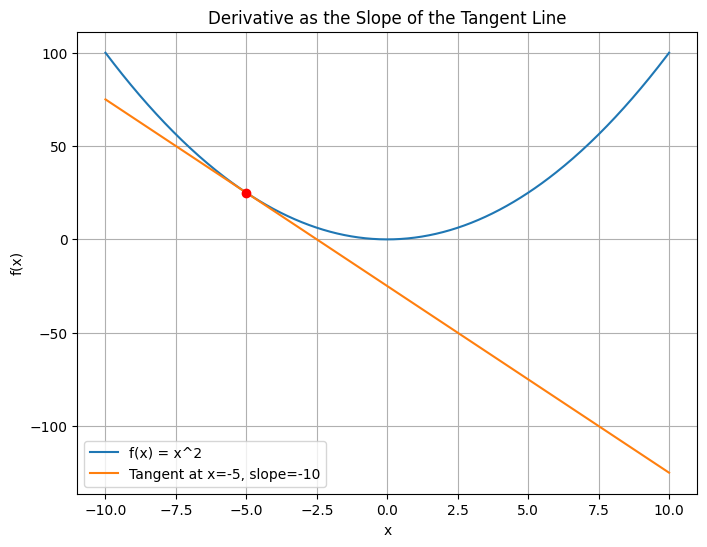

在 x = -5, 导数(斜率)是 -10。这是一个负数，意味着我们应该向右走（增加x）来下山。


In [2]:
def f(x):
    return x**2

# f(x)的导数是 f'(x) = 2x
def f_derivative(x):
    return 2 * x

# 生成x值
x = np.linspace(-10, 10, 400)
y = f(x)

# 选一个点来画切线, 比如 x = -5
point_x = -5
point_y = f(point_x)
slope = f_derivative(point_x)

# 切线方程 y = m(x - x1) + y1
tangent_line = slope * (x - point_x) + point_y

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = x^2')
plt.plot(x, tangent_line, label=f'Tangent at x={point_x}, slope={slope}')
plt.scatter(point_x, point_y, color='red', zorder=5)
plt.title('Derivative as the Slope of the Tangent Line')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"在 x = {point_x}, 导数(斜率)是 {slope}。这是一个负数，意味着我们应该向右走（增加x）来下山。")

## 2. 梯度：多维的“斜率”

在神经网络中，我们有成千上万的参数（权重w和偏置b），所以我们的损失函数是多维的。这时，导数的概念被推广为 **梯度 (Gradient)**。

梯度是一个向量，它的每个分量是损失函数对一个参数的 **偏导数 (Partial Derivative)**。

**偏导数** 的直觉是：当我们只允许一个参数变化，而固定所有其他参数时，损失函数的变化率是多少？

梯度向量 `∇L` 指向的是损失函数 **增长最快** 的方向。因此，梯度的反方向 `-∇L` 就是损失函数 **下降最快** 的方向——也就是我们下山最快的路！

### 可视化梯度

让我们想象一个更复杂一点的损失函数，它有两个参数 `w1` 和 `w2`。
`L(w1, w2) = w1² + w2²`

这是一个三维的“碗”。

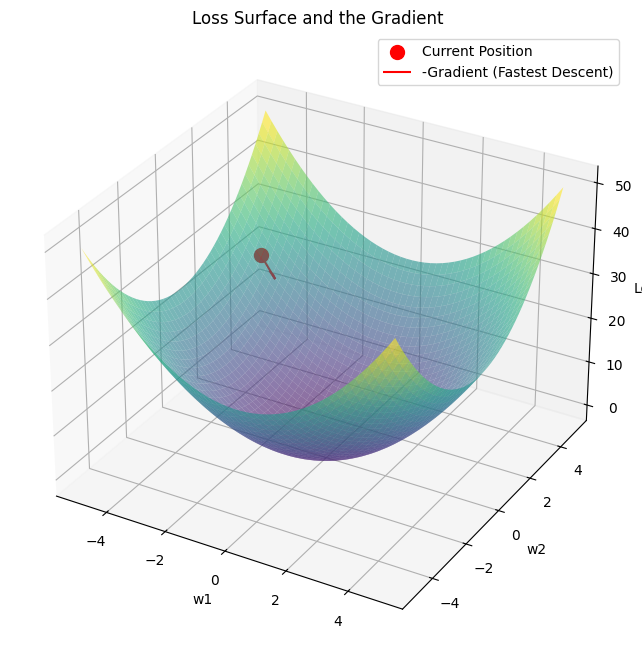

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def loss_surface(w1, w2):
    return w1**2 + w2**2

# 梯度是 [2*w1, 2*w2]
def gradient(w1, w2):
    return np.array([2*w1, 2*w2])

w1 = np.linspace(-5, 5, 50)
w2 = np.linspace(-5, 5, 50)
W1, W2 = np.meshgrid(w1, w2)
L = loss_surface(W1, W2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, L, cmap='viridis', alpha=0.6)

# 在某个点计算梯度, 比如 (w1, w2) = (-4, 3)
point_w1, point_w2 = -4, 3
point_loss = loss_surface(point_w1, point_w2)
grad = gradient(point_w1, point_w2)

ax.scatter(point_w1, point_w2, point_loss, color='red', s=100, label='Current Position')
# 画出梯度向量的反方向（下降最快的方向）
ax.quiver(point_w1, point_w2, point_loss, 
          -grad[0], -grad[1], -15, # z分量是为了可视化效果
          color='red', length=2, normalize=True, label='-Gradient (Fastest Descent)')

ax.set_title('Loss Surface and the Gradient')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')
ax.legend()
plt.show()

在上图中，红点是我们当前的位置。红色箭头（梯度的反方向）明确地指向了“碗底”的方向。这就是梯度下降算法的核心思想。

## 总结与展望

**关键回顾:**
1.  **导数是斜率:** 在一维中，它告诉我们函数的变化趋势。
2.  **梯度是多维斜率:** 它是一个向量，指向函数值增长最快的方向。
3.  **负梯度指引下山:** `-∇L` 是我们优化参数、降低损失所需要遵循的方向。

我们现在知道了如何找到降低损失的方向。但是，对于一个由成千上万参数组成的复杂神经网络，手动计算所有偏导数是不可能的。我们如何高效地计算出这个包含所有偏导数的巨大梯度向量呢？

这就是下一课的主题：**链式法则与反向传播**，它是深度学习中最核心、最巧妙的算法之一。